# A simple parameter exploration

This notebook demonstrates a very simple parameter exploration of a custom function that we have defined. It is a simple function that returns the distance to a unit circle, so we expect our parameter exploration to resemble a circle. 

In [1]:
# change to the root directory of the project
import os
if os.getcwd().split("/")[-1] == "examples":
    os.chdir('..')
    
# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2    

In [4]:
try:
    import matplotlib.pyplot as plt
except ImportError:
    import sys
    !{sys.executable} -m pip install matplotlib
    import matplotlib.pyplot as plt
    
import numpy as np

from neurolib.utils.parameterSpace import ParameterSpace
from neurolib.optimize.exploration import BoxSearch

## Define the evaluation function
Here we define a very simple evaluation function. The function needs to take in `traj` as an argument, which is the pypet trajectory. This is how the function knows what parameters were assigned to it. Using the builtin function `search.getParametersFromTraj(traj)` we can then retrieve the parameters for this run. They are returned as a dictionary and can be accessed in the function. 

In the last step, we use `search.saveToPypet(result_dict, traj)` to save the results to the pypet trajectory and to an HDF. In between, the computational magic happens!

In [5]:
def explore_me(traj):
    pars = search.getParametersFromTraj(traj)
    # let's calculate the distance to a circle
    computation_result = abs((pars['x']**2 + pars['y']**2) - 1)
    result_dict = {"distance" : computation_result}
    search.saveToPypet(result_dict, traj)

## Define the parameter space and exploration

Here we define which space we want to cover. For this, we use the builtin class `ParameterSpace` which provides a very easy interface to the exploration. To initialize the exploration, we simply pass the evaluation function and the parameter space to the `BoxSearch` class.

In [ ]:
parameters = ParameterSpace({"x": np.linspace(-2, 2, 2), "y": np.linspace(-2, 2, 2)})
# info: chose np.linspace(-2, 2, 40) or more, values here are low for testing
search = BoxSearch(evalFunction = explore_me, parameterSpace = parameters, filename="example-1.1.hdf")

## Run

And off we go!

In [ ]:
search.run()

## Get results

We can easily obtain the results from pypet. First we call `search.loadResults()` to make sure that the results are loaded from the hdf file to our instance.

In [ ]:
search.loadResults()
print("Number of results: {}".format(len(search.results)))

The runs are also ordered in a simple pandas dataframe called `search.dfResults`. We cycle through all results by calling `search.results[i]` and loading the desired result (here the distance to the circle) into the dataframe

In [28]:
for i in search.dfResults.index:
    search.dfResults.loc[i, 'distance'] = search.results[i]['distance']
    
search.dfResults

,x,y,distance
0,-2.0,-2.000000,7.000000
1,-2.0,-1.897436,6.600263
2,-2.0,-1.794872,6.221565
3,-2.0,-1.692308,5.863905
4,-2.0,-1.589744,5.527285
...,...,...,...
1595,2.0,1.589744,5.527285
1596,2.0,1.692308,5.863905
1597,2.0,1.794872,6.221565
1598,2.0,1.897436,6.600263


And of course a plot can visualize the results very easily.

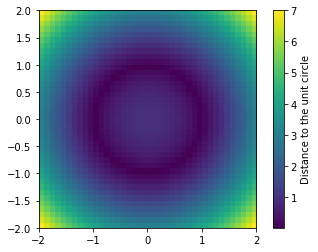

In [29]:
plt.imshow(search.dfResults.pivot_table(values='distance', index = 'x', columns='y'), \
           extent = [min(search.dfResults.x), max(search.dfResults.x),
                     min(search.dfResults.y), max(search.dfResults.y)], origin='lower')
plt.colorbar(label='Distance to the unit circle')